In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
# Load data
data = pd.read_csv('Resources/cleaned_reliance_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
closing_price = data['Close'].values.reshape(-1, 1)

In [7]:
# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(closing_price)

In [8]:
# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

In [9]:
# Split data into train and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [10]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)

c:\Users\ayeni\anaconda3\envs\dev\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0067
Epoch 2/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0015
Epoch 3/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0019
Epoch 4/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0014
Epoch 5/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0013
Epoch 6/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 9.7753e-04
Epoch 7/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 9.2919e-04
Epoch 8/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 7.9588e-04
Epoch 9/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 6.6784e-04
Epoch 10/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 7.8664e-04
Epoch 11/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 6.2490e-04
Epoch 12/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 6.1876e-04
Epoch 13/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 7.9919e-04
Epoch 14/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0014
Epoch 15/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 

In [11]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


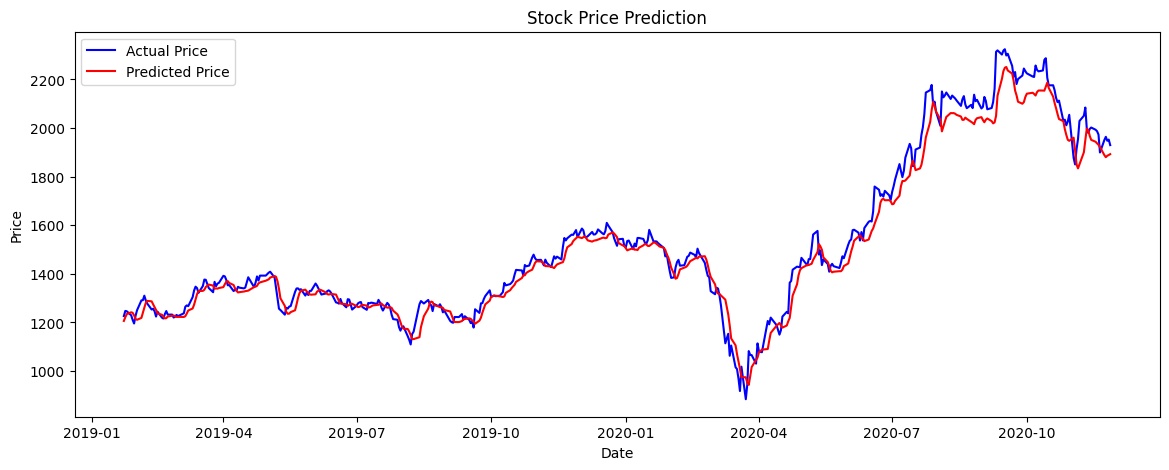

In [12]:
# Plot results
plt.figure(figsize=(14,5))
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test), color='blue', label='Actual Price')
plt.plot(data.index[-len(y_test):], predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


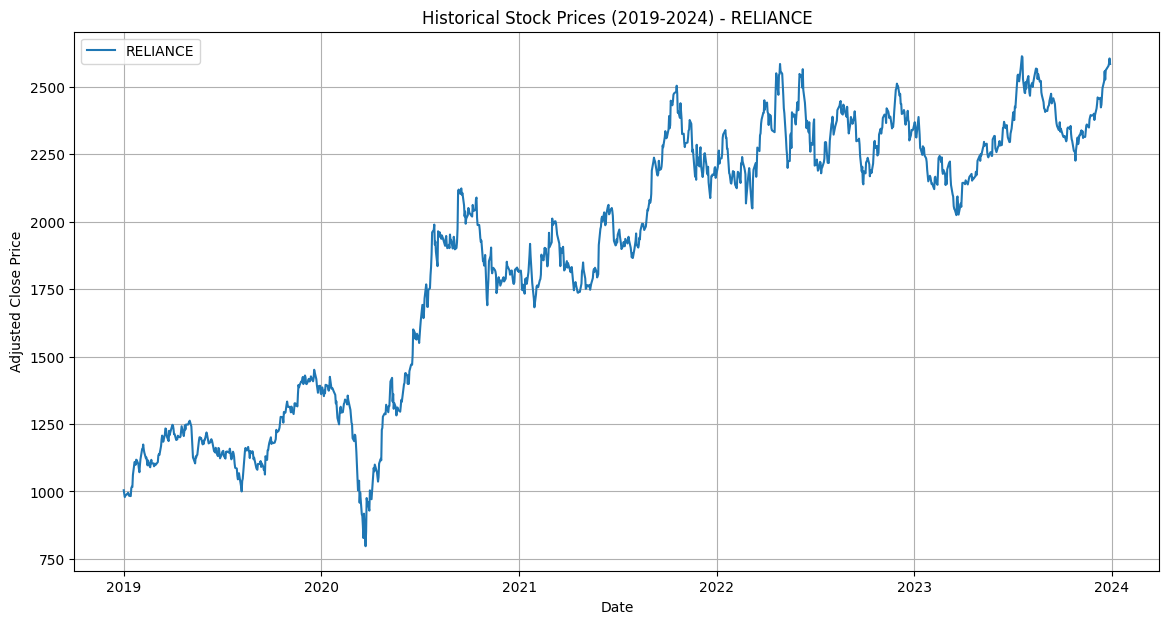

In [7]:
# Download data for the past 5 years for RELIANCE
reliance_data = yf.download('RELIANCE.NS', start='2019-01-01', end='2024-01-01')['Adj Close']

# Plot historical prices
plt.figure(figsize=(14, 7))
plt.plot(reliance_data, label='RELIANCE')
plt.title('Historical Stock Prices (2019-2024) - RELIANCE')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

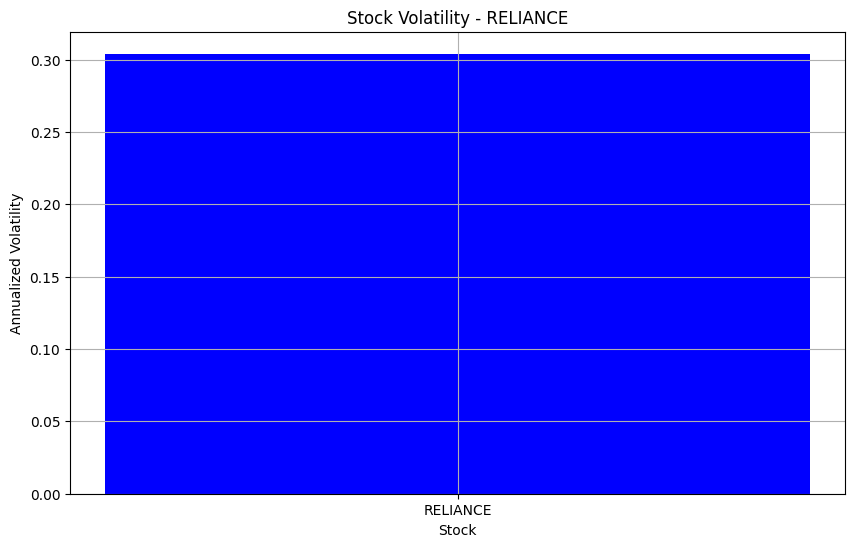

In [8]:
# Calculate daily returns
reliance_returns = reliance_data.pct_change().dropna()

# Calculate annualized volatility
reliance_volatility = reliance_returns.std() * np.sqrt(252)

# Plot volatility
plt.figure(figsize=(10, 6))
plt.bar(['RELIANCE'], [reliance_volatility], color=['blue'])
plt.title('Stock Volatility - RELIANCE')
plt.xlabel('Stock')
plt.ylabel('Annualized Volatility')
plt.grid(True)
plt.show()

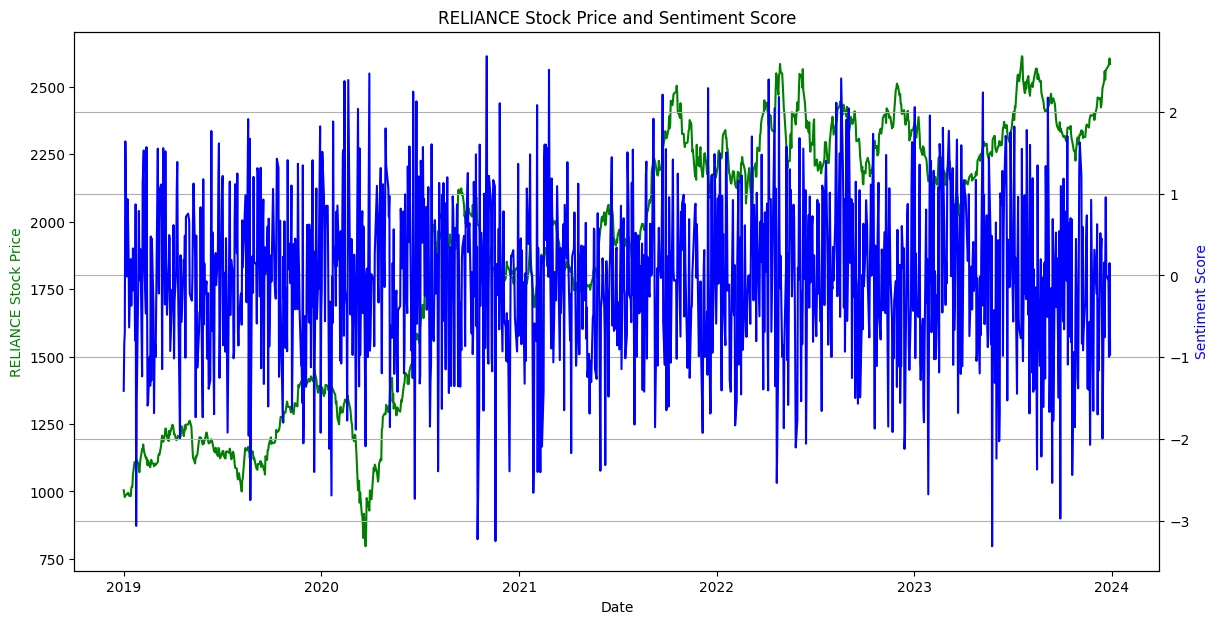

In [9]:
sentiment_data_reliance = pd.DataFrame({
    'Date': reliance_data.index,
    'Sentiment Score': np.random.randn(len(reliance_data))
}).set_index('Date')

# Plot sentiment scores alongside stock prices
fig, ax1 = plt.subplots(figsize=(14, 7))

ax2 = ax1.twinx()
ax1.plot(reliance_data, 'g-')
ax2.plot(sentiment_data_reliance['Sentiment Score'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('RELIANCE Stock Price', color='g')
ax2.set_ylabel('Sentiment Score', color='b')

plt.title('RELIANCE Stock Price and Sentiment Score')
plt.grid(True)
plt.show()


C:\Users\ayeni\AppData\Local\Temp\ipykernel_11876\483206709.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'RELIANCE': np.linspace(reliance_data[-1], reliance_data[-1]*1.5, 5*252)


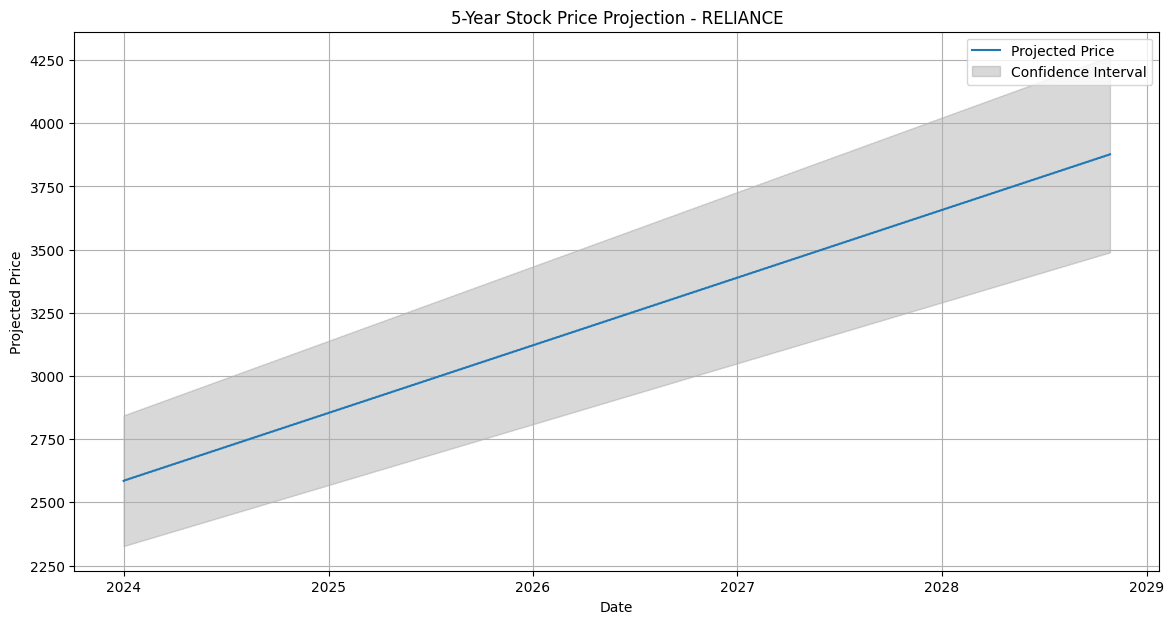

In [10]:
projection_data_reliance = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=5*252, freq='B'),
    'RELIANCE': np.linspace(reliance_data[-1], reliance_data[-1]*1.5, 5*252)
}).set_index('Date')

# Plot 5-year projection with confidence interval
plt.figure(figsize=(14, 7))
plt.plot(projection_data_reliance['RELIANCE'], label='Projected Price')
plt.fill_between(projection_data_reliance.index, projection_data_reliance['RELIANCE']*0.9, projection_data_reliance['RELIANCE']*1.1, color='gray', alpha=0.3, label='Confidence Interval')
plt.title('5-Year Stock Price Projection - RELIANCE')
plt.xlabel('Date')
plt.ylabel('Projected Price')
plt.legend()
plt.grid(True)
plt.show()